# Text Classification

Here, we are using text data to perform a classification. The dataset consists of Women’s fashion online shop reviews, consisting of a title, a review text, and whether the review author would recommend the product. We are trying to determine whether a reviewer will recommend a product or not based on review title and review.

The data can be found at

https://www.dropbox.com/s/6ot9w3on66gp129/hw5_data_test.csv?dl=1

https://www.dropbox.com/s/71q00c3r3vmsz9j/hw5_data_train.csv?dl=1

Each review is made of a review title and a the review in itself (the body). We also have the information if the customer recommends a product or not.

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer

In [3]:
data_train = pd.read_csv("hw5_data_train.csv")
data_test = pd.read_csv("hw5_data_test.csv")

In [4]:
data_train.Title.fillna('', inplace=True)
data_train.Review.fillna('', inplace=True)

In [5]:
data_test.Title.fillna('', inplace=True)
data_test.Review.fillna('', inplace=True)

# 1 Using Title and Body

We will look at four ways to use the data

1) Use the title only

2) Use the review body only

3) Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body)

4) Vectorizing title and review individually and concatenating the vector representations.


In [6]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=40):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

In [9]:
param_grid = {"logisticregression__C" : np.logspace(-4,4,20)}

## 1.1

In [55]:
vect = CountVectorizer()
X = vect.fit_transform(data_train.Title)
feature_names = vect.get_feature_names()

In [56]:
lr = LogisticRegression(class_weight = "balanced").fit(X, data_train.Recommended)

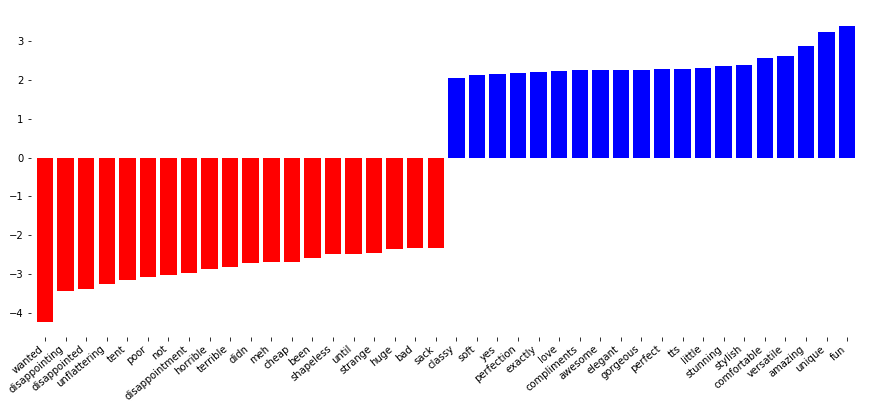

In [57]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

In [58]:
pipe = make_pipeline(CountVectorizer(), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")

In [59]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid.fit(data_train.Title, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [60]:
grid.best_score_

0.8908702643453187

In [61]:
best_lr = grid.best_estimator_.steps[1][1].fit(X, data_train.Recommended)

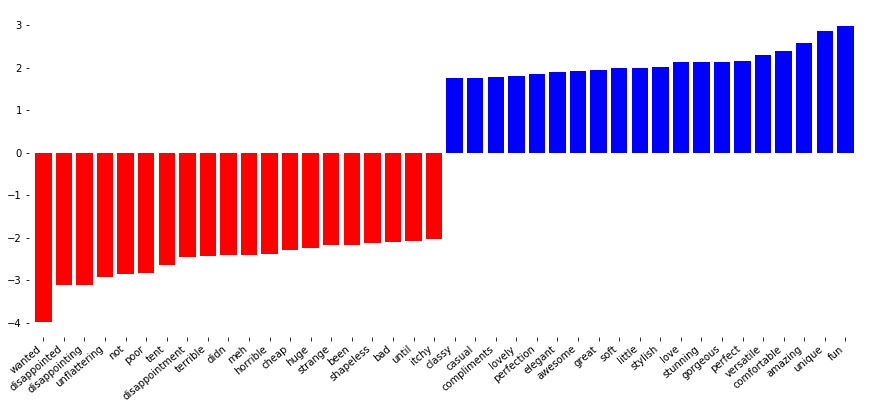

In [62]:
plt.figure(figsize=(15, 6))
plot_important_features(best_lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

## 1.2

In [63]:
vect = CountVectorizer()
X = vect.fit_transform(data_train.Review)
feature_names = vect.get_feature_names()

In [64]:
lr = LogisticRegression(class_weight = "balanced").fit(X, data_train.Recommended)

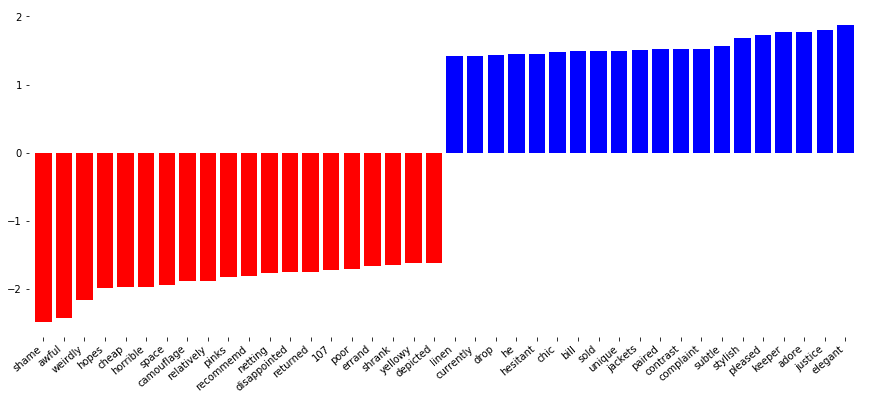

In [65]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

In [66]:
pipe = make_pipeline(CountVectorizer(), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")

In [67]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid.fit(data_train.Review, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [68]:
grid.best_score_

0.924447695811932

In [69]:
best_lr = grid.best_estimator_.steps[1][1].fit(X, data_train.Recommended)

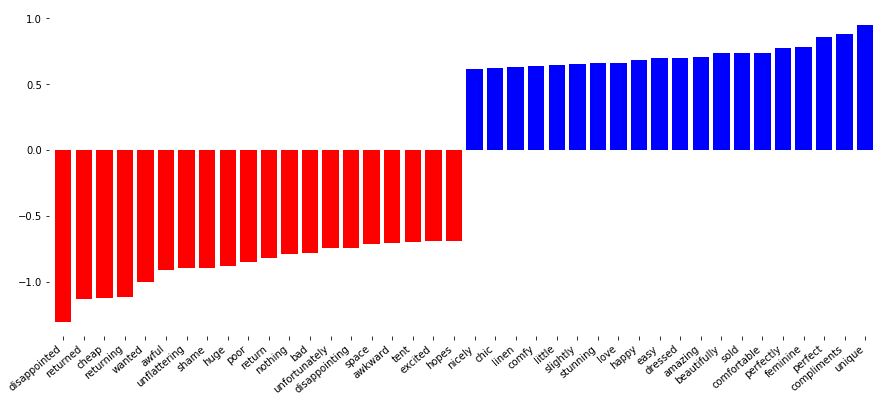

In [70]:
plt.figure(figsize=(15, 6))
plot_important_features(best_lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

## 1.3

In [71]:
vect = CountVectorizer()
X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
feature_names = vect.get_feature_names()

In [72]:
lr = LogisticRegression(class_weight = "balanced").fit(X, data_train.Recommended)

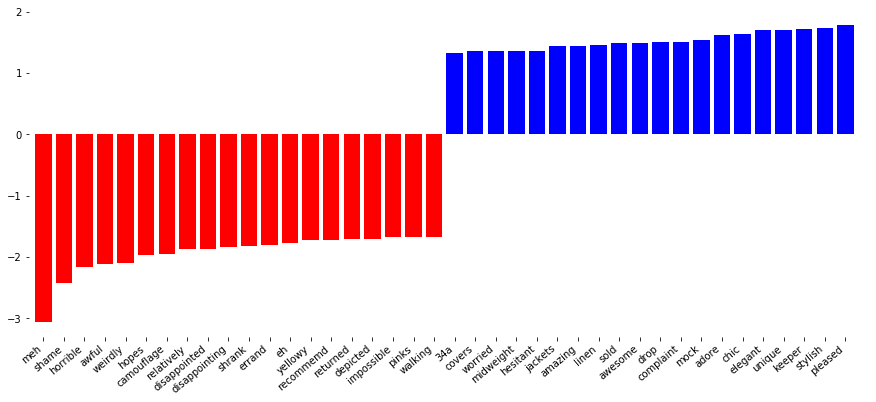

In [73]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

In [75]:
pipe = make_pipeline(CountVectorizer(), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")

In [76]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [77]:
grid.best_score_

0.9404929535563924

In [78]:
best_lr = grid.best_estimator_.steps[1][1].fit(X, data_train.Recommended)

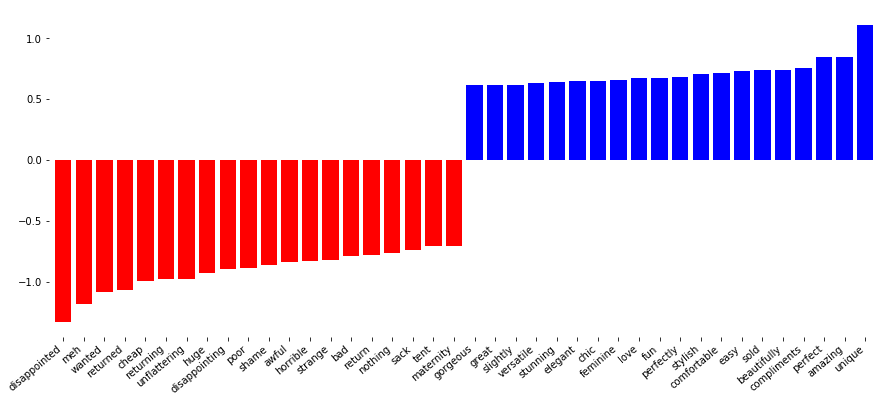

In [79]:
plt.figure(figsize=(15, 6))
plot_important_features(best_lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

## 1.4

In [25]:
vect_title = CountVectorizer()
X_title = vect_title.fit_transform(data_train.Title)
feature_names_title = vect_title.get_feature_names()
feature_names_title = ['title_' + word for word in feature_names_title]

In [26]:
vect_review = CountVectorizer()
X_review = vect_review.fit_transform(data_train.Review)
feature_names_review = vect_review.get_feature_names()
feature_names_review = ['title_' + word for word in feature_names_review]

In [27]:
X = hstack((X_title, X_review))
feature_names = feature_names_title + feature_names_review

In [28]:
lr = LogisticRegression(class_weight = "balanced").fit(X, data_train.Recommended)

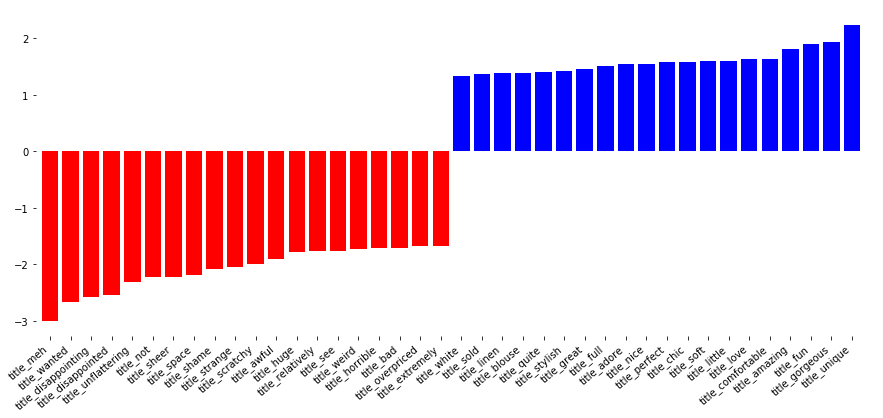

In [29]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

In [30]:
grid = GridSearchCV(LogisticRegression(class_weight = "balanced"), param_grid = {"C" : np.logspace(-4,4,20)}, scoring = 'roc_auc', cv = 5)
grid.fit(X, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
grid.best_score_

0.9408778219130899

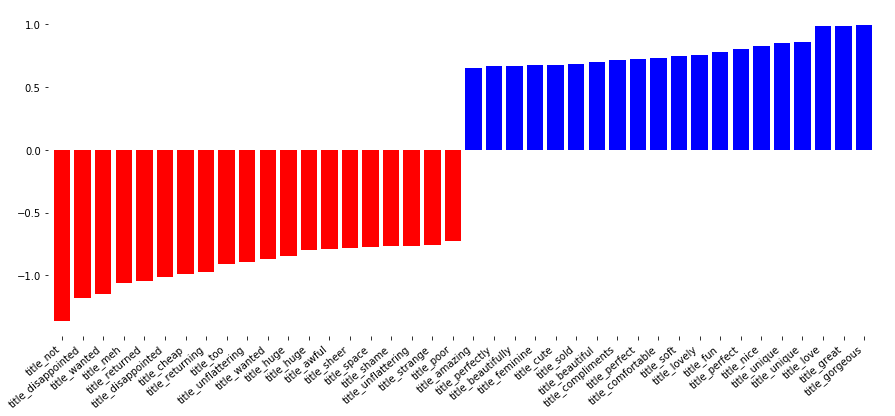

In [32]:
plt.figure(figsize=(15, 6))
plot_important_features(grid.best_estimator_.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

## Test set

Here, we just need to call the vectorizers and the trained logistic regression of the previous step

In [33]:
X_title = vect_title.transform(data_test.Title)
X_review = vect_review.transform(data_test.Review)

In [34]:
X_test = hstack((X_title, X_review))

In [35]:
grid.score(X_test, data_test.Recommended)

0.9381219291326154

The fourth option, where we concatenate the vector representations of the title and the review, works best. We reach a ROC AUC score of 0.94 on the test set.

This makes sense, as this contains more information than the first two options, where we only vectorize the title or the review. It is also slightly better than the third option where we concatenate the title and the review before the vectorization as we keep the information of whether a certain word was used in the title or in the review. It is helpful to do that because usually, the title will resume customers opinion in very few words, giving title words a particular significance.

# Feature Tuning


### 2.1

Using TdifVectorizer does change the important coefficient, for example love comes as the most important positive word whereas with CountVectorizer it used to be unique. It also improves the validation score (from **0.940** to **0.948**)

In [16]:
vect = TfidfVectorizer()
X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
feature_names = vect.get_feature_names()

In [12]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")

In [13]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [14]:
grid.best_score_

0.9481772981392428

In [17]:
best_lr = grid.best_estimator_.steps[1][1].fit(X, data_train.Recommended)

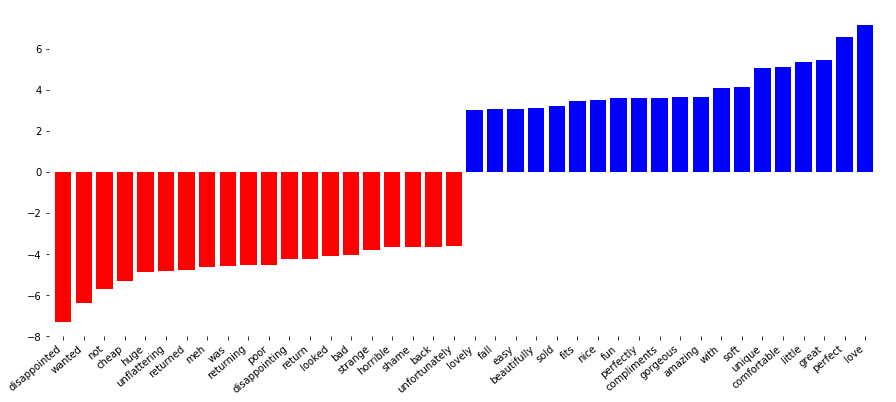

In [18]:
plt.figure(figsize=(15, 6))
plot_important_features(best_lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

### 2.2

Using Normalizer on the CountVectorizer does improve our validation score (from **0.940** to **0.946**), but does not perform quite as well as the tdidf-vectorizer used in the previous step. It slightly changes the feature importance but not as much as when we use the tfid vectorizer.

In [20]:
vect=CountVectorizer()
norm=Normalizer()
X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
X=norm.fit_transform(X)
feature_names=vect.get_feature_names()

In [21]:
pipe = make_pipeline(CountVectorizer(), Normalizer(), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")

In [22]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [23]:
grid.best_score_

0.945680304416991

In [26]:
best_lr = grid.best_estimator_.steps[2][1].fit(X, data_train.Recommended)

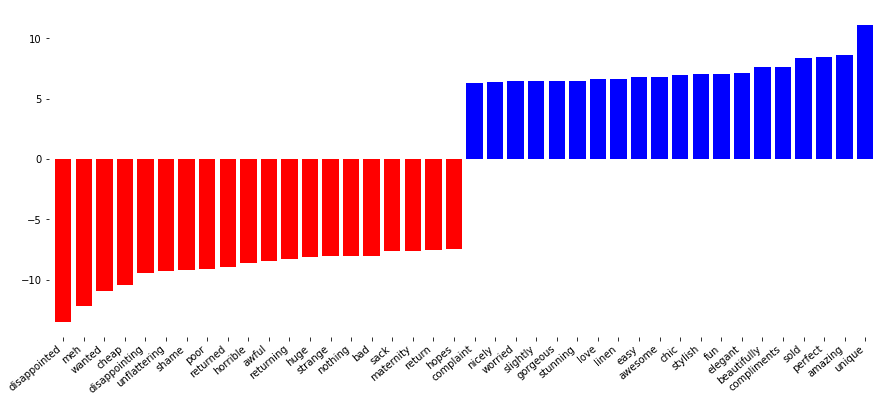

In [27]:
plt.figure(figsize=(15, 6))
plot_important_features(best_lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

### 2.3

Removing the standard English stop-words doesn't help, they lower our validation score from **0.940** to **0.939**. They don't change the most important features, which makes sense since stop words are often considered as words than are not important to the context of a sentence. 

In [28]:
vect=TfidfVectorizer(stop_words="english")
X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
feature_names = vect.get_feature_names()

In [29]:
pipe = make_pipeline(TfidfVectorizer(stop_words="english"), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")

In [30]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
grid.best_score_

0.9392970008384438

In [26]:
best_lr = grid.best_estimator_.steps[1][1].fit(X, data_train.Recommended)

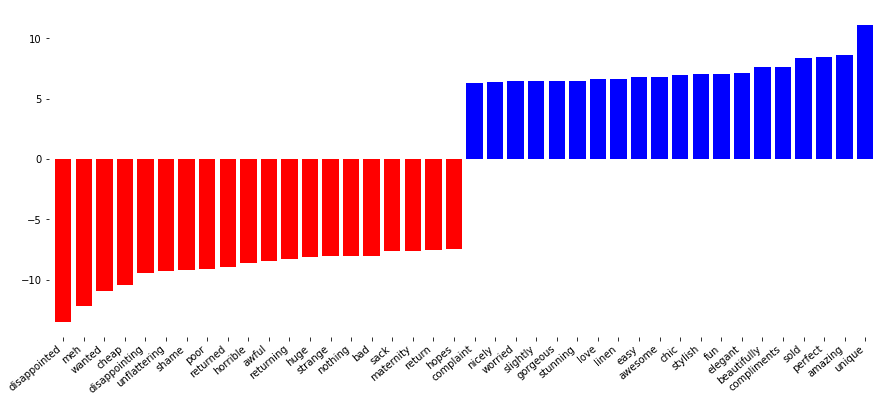

In [27]:
plt.figure(figsize=(15, 6))
plot_important_features(best_lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)

### 2.4

Limit the vocabulary using min_df or max_df. How to these impact the number of features,
and how do they impact the scores?

In [80]:
score=[]
number_features=[]
for min_df in range(1,10):
    vect=TfidfVectorizer(min_df=min_df)
    X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
    number_features.append(X.shape[1])
    pipe = make_pipeline(TfidfVectorizer(min_df=min_df), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")
    grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
    grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
    score.append(grid.best_score_)

In [81]:
print('Max validation score {: .3f}'.format(max(score)))
print('Min df {: }'.format(np.argmax(np.array(score))+1))

Max validation score  0.948
Min df  3


Limiting the vocabulary with min_df improves our score. Our model seems to perform best when we limit our model with min_df = 3.

Text(0,0.5,'score')

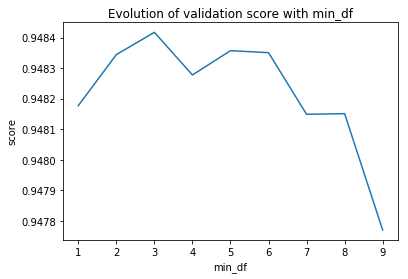

In [67]:
plt.plot(np.arange(1,10),score)
plt.title("Evolution of validation score with min_df")
plt.xlabel("min_df")
plt.ylabel("score")

The number of features decreases exponentially with min_df. There is a lot to gain in terms of the dimension of our feature space and the score of our model if we take min_df=4. 

Text(0,0.5,'score')

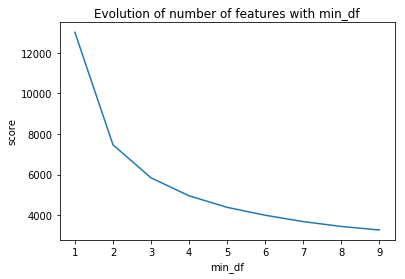

In [68]:
plt.plot(np.arange(1,10),number_features)
plt.title("Evolution of number of features with min_df")
plt.xlabel("min_df")
plt.ylabel("score")

The gain from tuning max_df is not as obvious. The score seems to be worst if we liit the vocabulary using max_df, eventhough it helps with the dimension of our feature space.

In [74]:
score=[]
number_features=[]
for max_df in np.arange(1,11)/10:
    vect=TfidfVectorizer(max_df=max_df)
    X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
    number_features.append(X.shape[1])
    pipe = make_pipeline(TfidfVectorizer(max_df=max_df), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")
    grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
    grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
    score.append(grid.best_score_)

In [78]:
print('Max validation score {: .3f}'.format(max(score)))
print('Max df {: }'.format(np.argmax(np.array(score))+1))

Max validation score  0.948
Max df  8


Text(0,0.5,'score')

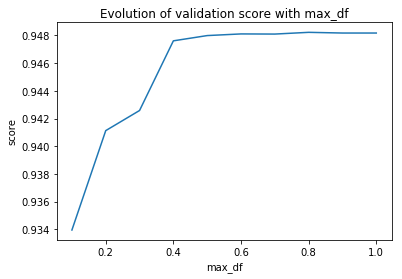

In [75]:
plt.plot(np.arange(1,11)/10,score)
plt.title("Evolution of validation score with max_df")
plt.xlabel("max_df")
plt.ylabel("score")

Text(0,0.5,'score')

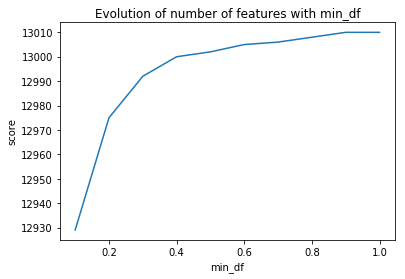

In [76]:
plt.plot(np.arange(1,11)/10,number_features)
plt.title("Evolution of number of features with min_df")
plt.xlabel("min_df")
plt.ylabel("score")

Our best model so far  is therefore TfidVectorizer with min_df=3.

# 3 N-grams

## 3.1

The best validation score is for n_grams=2, with a score of 0.9545. When vizualizing the important higher order n-gram features, we notice that a lot of them are words related to sentiment (love, want, etc.) associated with stopwords such as not, but,this etc. .

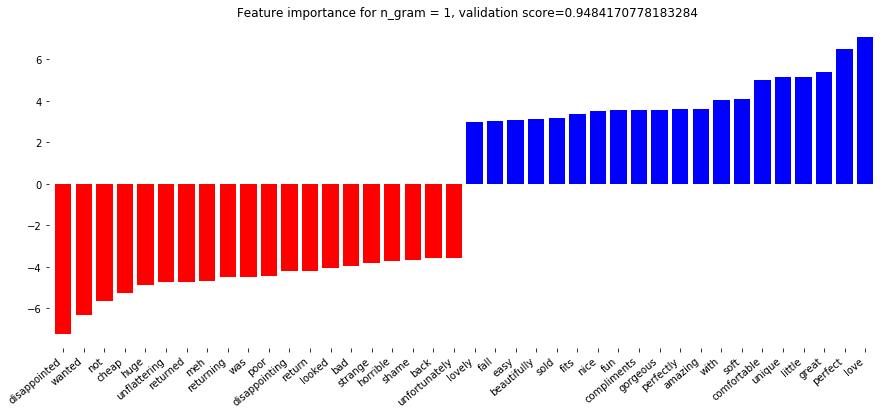

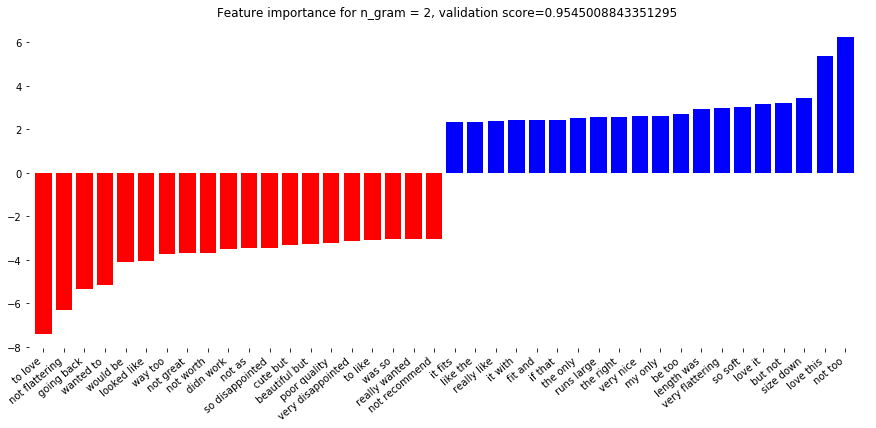

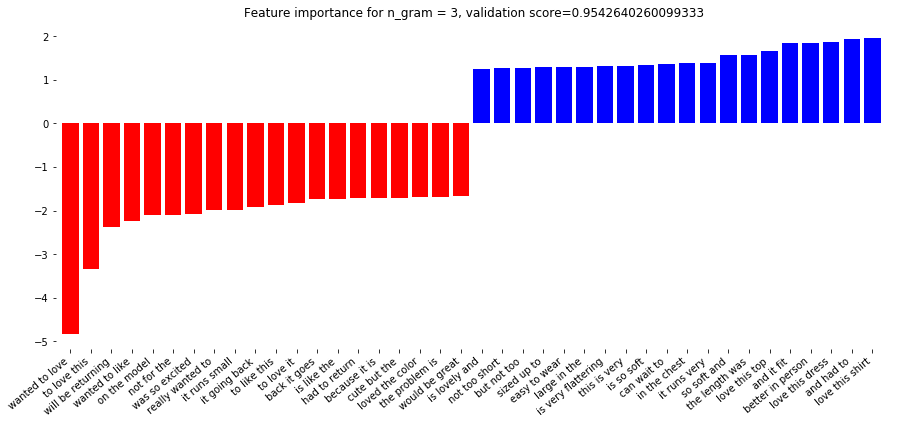

In [107]:
for n in [1,2,3]:
    vect=TfidfVectorizer(min_df=3,ngram_range=(1,n))
    X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
    feature_names = vect.get_feature_names()
    pipe = make_pipeline(TfidfVectorizer(min_df=3,ngram_range=(1,n)), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")
    grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
    grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
    best_lr = grid.best_estimator_.steps[1][1].fit(X, data_train.Recommended)
    index=[feature for feature in  range(len(feature_names)) if len(feature_names[feature].split(" "))==n]
    plt.figure(figsize=(15, 6))
    plt.title("Feature importance for n_gram = {}, validation score={}".format(n,grid.best_score_))
    plot_important_features(np.array([best_lr.coef_.ravel()[i] for i in index]),
                            np.array([feature_names[i] for i in index]), top_n=20, rotation=40)

## 3.2

In [108]:
n_grams = [(i,j) for i in range(2,6) for j in range(i,6)]

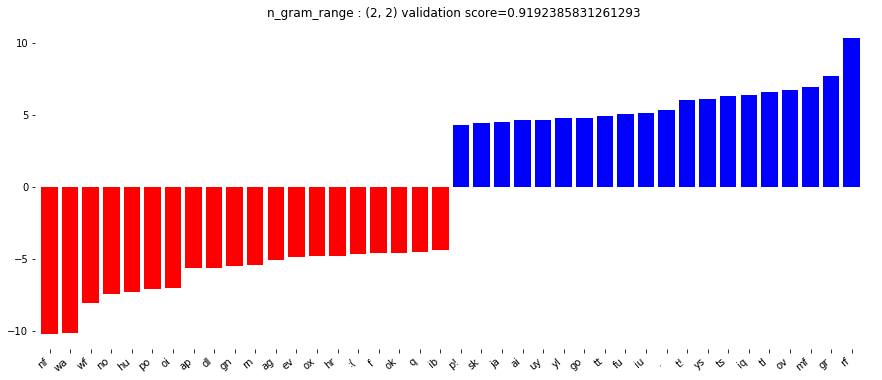

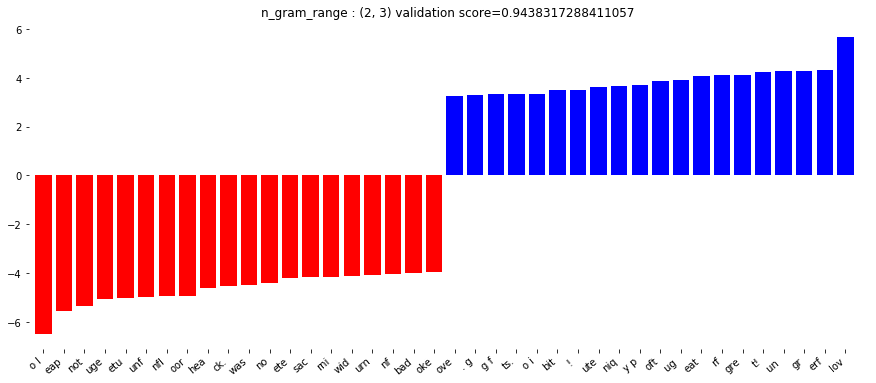

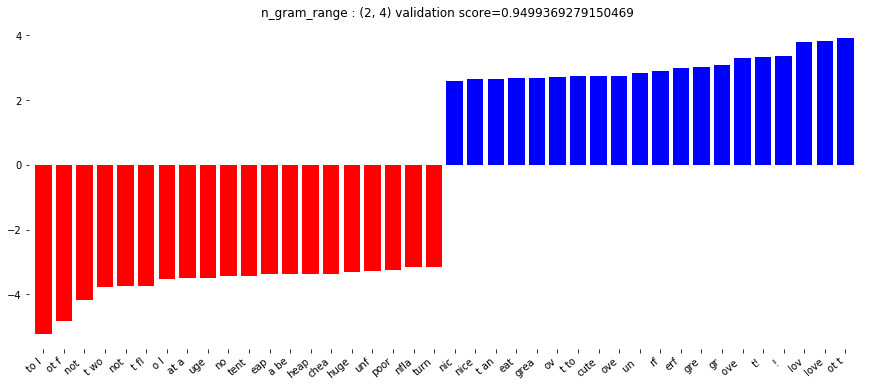

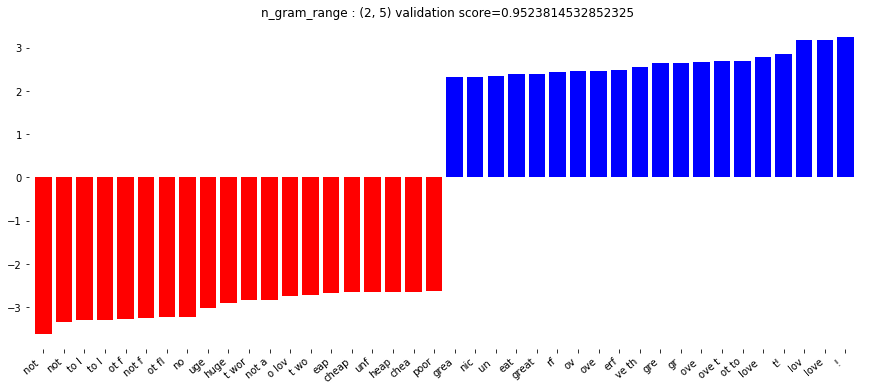

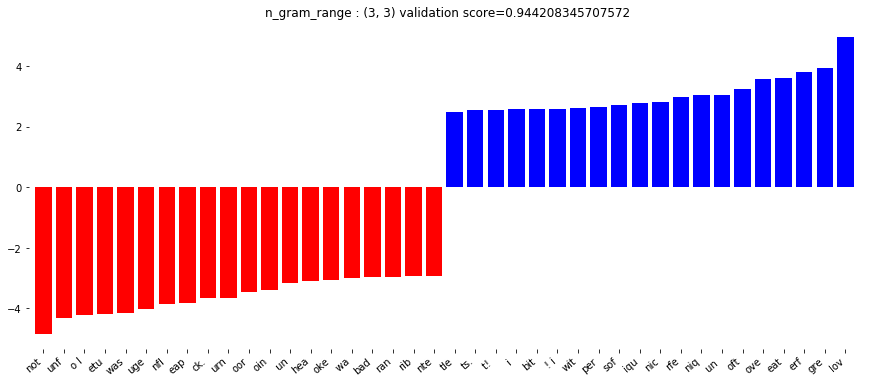

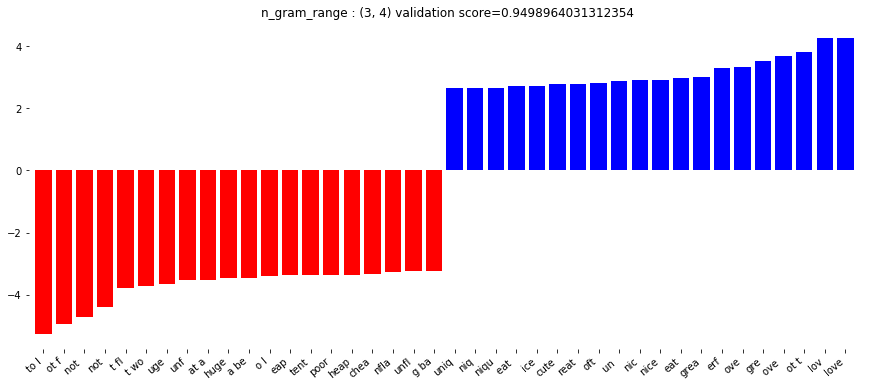

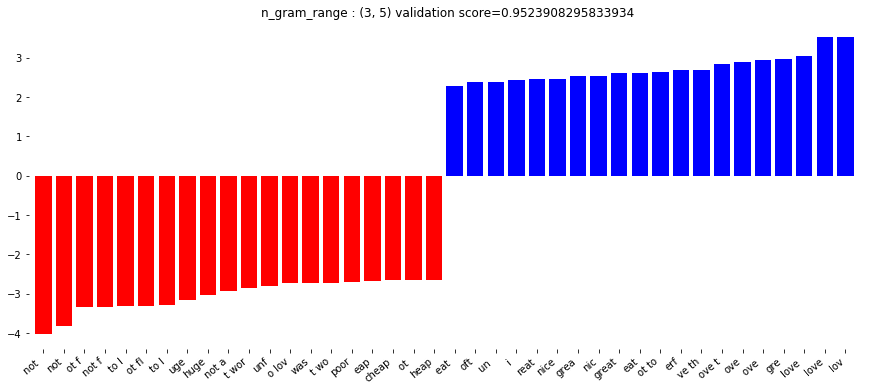

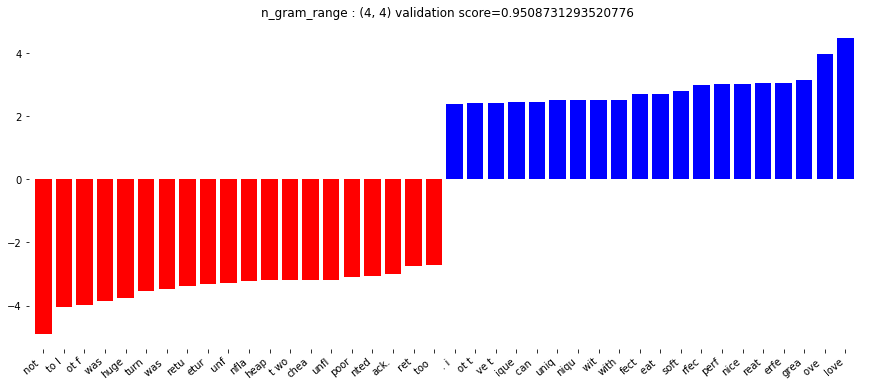

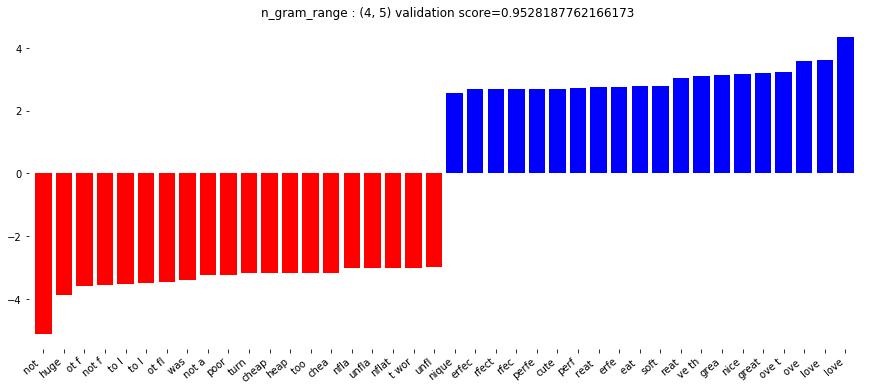

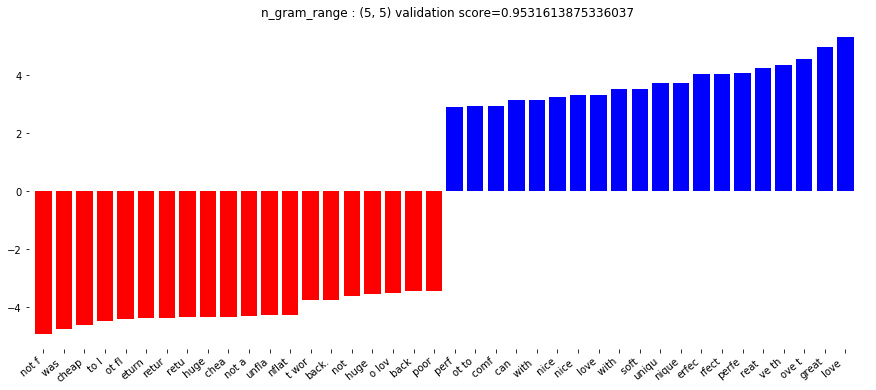

In [109]:
for ngram in n_grams:
    vect = TfidfVectorizer(ngram_range=ngram, min_df=3, analyzer="char")
    X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
    feature_names = vect.get_feature_names()
    pipe = make_pipeline(TfidfVectorizer(ngram_range=ngram, min_df=3, analyzer="char"), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")
    grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
    grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
    best_lr = grid.best_estimator_.steps[1][1].fit(X, data_train.Recommended)
    index=[feature for feature in  range(len(feature_names))]
    plt.figure(figsize=(15, 6))
    plt.title("n_gram_range : " + str(ngram) + " " + "validation score={}".format(grid.best_score_))
    plot_important_features(np.array([best_lr.coef_.ravel()[i] for i in index]),
                            np.array([feature_names[i] for i in index]), top_n=20, rotation=40)
    

The best cross-validation score is obtained for ngram_range = (5,5), reaching 0.953

From the coefficients, we can see parts of the most important words used in the words n-grams reappear, for instance "perf", "erfec" and "rfect". 

## 3.3

Here we will use n_gram = 2, as it is the parameter that we found to work best

In [126]:
score=[]
number_features=[]
for min_df in range(1,10):
    vect = TfidfVectorizer(min_df = min_df, ngram_range=(1,2))
    X = vect.fit_transform(data_train.Title + ' ' + data_train.Review)
    number_features.append(X.shape[1])
    pipe = make_pipeline(TfidfVectorizer(min_df = min_df,ngram_range=(1,2)), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")
    grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
    grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
    score.append(grid.best_score_)

In [131]:
print('Max validation score {: .4f}'.format(max(score)))
print('Min df {: }'.format(np.argmax(np.array(score))+1))

Max validation score  0.9547
Min df  2


Text(0,0.5,'score')

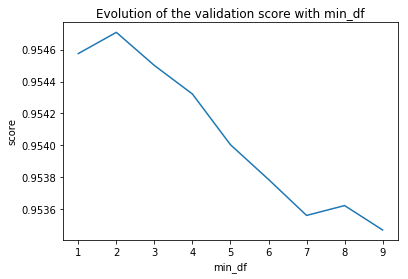

In [128]:
plt.plot(np.arange(1,10),score)
plt.title("Evolution of the validation score with min_df")
plt.xlabel("min_df")
plt.ylabel("score")

Text(0,0.5,'number of features')

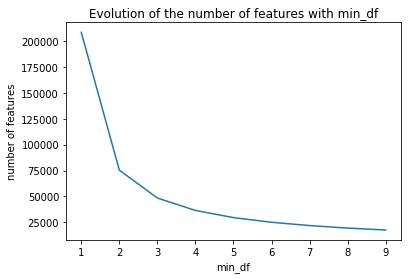

In [129]:
plt.plot(np.arange(1,10),number_features)
plt.title("Evolution of the number of features with min_df")
plt.xlabel("min_df")
plt.ylabel("number of features")

In [132]:
pipe = make_pipeline(TfidfVectorizer(stop_words="english", ngram_range=(1,2)), LogisticRegression(class_weight = "balanced"), memory = "cache_folder")

In [133]:
grid = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [135]:
print("Score without stopwords = {: .4f}, Number of features without stopwords = {}".format(score[0],number_features[0]))
print("Score with stopwords = {: .4f}, Number of features with stopwords = {}".format(grid.best_score_,X.shape[1]))

Score without stopwords =  0.9546, Number of features without stopwords = 208535
Score with stopwords =  0.9438, Number of features with stopwords = 17495


Using the stopwords decreases the quality of the model, however, it is really interesting in terms of computational speed as it allows to reduce the number of features to less than 10% of the total features with 2-gram. Even if we prefer not deleting the stopwords for our best model, it might still be a valid option in other cases as the AUC score remains high.

The best model we have found so far is using tfidf with 2-gram and min_df = 2.

#  Model Tuning

In [136]:
best_vectorizer = TfidfVectorizer(min_df = 2, ngram_range=(1,2))

## Logistic Regression with l2 penalty

In [139]:
pipe = make_pipeline(best_vectorizer, LogisticRegression(penalty = "l2", class_weight = "balanced"), memory = "cache_folder")

In [140]:
grid_log_l2 = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid_log_l2.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
grid_log_l2.best_score_

0.9547089156183828

## Logistic Regression with l1 penalty

In [141]:
pipe = make_pipeline(best_vectorizer, LogisticRegression(penalty = "l1", class_weight = "balanced"), memory = "cache_folder")

In [142]:
grid_log_l1 = GridSearchCV(pipe, param_grid, scoring = 'roc_auc', cv = 5)
grid_log_l1.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
grid_log_l1.best_score_

0.9489245658612638

## LinearSVC with l2 penalty

In [143]:
param_grid_svm = {"linearsvc__C" : np.logspace(-4,4,20)}

In [144]:
pipe = make_pipeline(best_vectorizer, LinearSVC(penalty = "l2", class_weight = "balanced"), memory = "cache_folder")

In [146]:
grid_svc_l2 = GridSearchCV(pipe, param_grid_svm, scoring = 'roc_auc', cv = 5)
grid_svc_l2.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
grid_svc_l2.best_score_

0.9548512161734057

## Linear SVC with l1 penalty

In [151]:
pipe = make_pipeline(best_vectorizer, LinearSVC(penalty = "l1", class_weight = "balanced", dual = False), memory = "cache_folder")

In [152]:
grid_svc_l1 = GridSearchCV(pipe, param_grid_svm, scoring = 'roc_auc', cv = 5)
grid_svc_l1.fit(data_train.Title + ' ' + data_train.Review, data_train.Recommended)
grid_svc_l1.best_score_

0.9488594753297518

As we can see from both classifiers, the l2 penalty seems to be working better. It also seems like the LinearSVC would be doing slightly better than the Logistic Regression, reaching a ROC AUC score of **0.9549** with cross-validation. This is the model we will be using on the test set.

## Test set

In [153]:
grid_svc_l2.score(data_test.Title + ' ' + data_test.Review, data_test.Recommended)

0.9514814121378765

Using this model, we get a ROC AUC score of 0.951 on the test set.

Other possibilities to explore would have included trying out different tokenization options, different normalizations, vocabulary restrictions, for instance removing clothes-related words etc